<a href="https://colab.research.google.com/github/MarvinLopezOsorio/AnaliticaPredictiva_Tareas/blob/main/Clustering%20vinos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center>

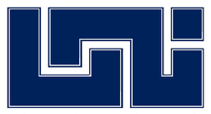

<h1><b>
Dirección de Estudios de Posgrado y Educación Continua
<h2><b>
Analítica Predictiva y Machine Learning con R, Python y Databricks


[UNI-DEPEC](https://posgrado.uni.edu.ni)

**Estudiante:** 
*   Marvin López Osorio
*   Eduardo Rivera


# **Tarea Modelos No Supervisados**
## **Modelo de Clustering: Grupos de vino**
Los set de datos procesados corresponden a datos de variantes de vino tinto. Se utilizó como fuente el [dataset en Kaggle](https://www.kaggle.com/uciml/red-wine-quality-cortez-et-al-2009) que referencia al [repositorio de la University of California, Irvine](https://archive.ics.uci.edu/ml/datasets/wine+quality). En este Colab se exploran los posibles 'tipos de vino' en funcion de sus características físico-químicas, no se consideró para el experimento la separación de vino tinto/blanco procedente de los dataset originales, con el objetivo de observar que conjuntos de vino pueden ser identificados, y si son claramente definidos.

###**Instalación de librerias necesarias**

In [5]:
#Instalar libreria
!pip install pycaret

###**Carga de librerias necesarias**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from pycaret.clustering import *

In [ ]:
#Referencias al repositorio de origen
repositorio = 'https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/'
red_wine_file = 'winequality-red.csv'
white_wine_file = 'winequality-white.csv'

#Leer datos
red_wine = pd.read_csv(repositorio + red_wine_file, sep=';')
white_wine = pd.read_csv(repositorio + white_wine_file, sep=';')

#Combinar los dataset
vinos = red_wine.append(white_wine)
vinos

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


#EDA